In [ ]:
# 8-1
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense # 컨볼루션층, 풀링층, Flattern연산에 사용할 클래스
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저 사용

# 데이터 준비
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data() # mnist 데이터셋 읽기
## 신경망에 입력할 형태로 변환 : 3차원 구조 변환
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10) 

# 모델선택 (신경망 구조 설계 : LeNet-5 신경망 구조 생성)
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1))) # conv 층 추가
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2)) # 풀링층 추가
cnn.add(Conv2D(16,(5,5),padding='valid',activation='relu')) # conv 층 추가
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2)) # 풀링층 추가
cnn.add(Conv2D(120,(5,5),padding='valid',activation='relu')) # conv 층 추가
cnn.add(Flatten()) # Flatten연산: 텐서 1차원 구조 변환해 완전연결층 입력
cnn.add(Dense(units=84,activation='relu')) # 완전연결층 추가
cnn.add(Dense(units=10,activation='softmax')) # 안전 연결층추가

# 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy']) # accuracy사용해 성능조사
cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)  # 실제 학습

# 예측(성능 측정)                              
res=cnn.evaluate(x_test,y_test,verbose=0) 
print('정확률=',res[1]*100)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 31s - loss: 0.3150 - accuracy: 0.9066 - val_loss: 0.0921 - val_accuracy: 0.9712 - 31s/epoch - 66ms/step
Epoch 2/30
469/469 - 30s - loss: 0.0848 - accuracy: 0.9744 - val_loss: 0.0570 - val_accuracy: 0.9805 - 30s/epoch - 65ms/step
Epoch 3/30
469/469 - 28s - loss: 0.0602 - accuracy: 0.9816 - val_loss: 0.0490 - val_accuracy: 0.9841 - 28s/epoch - 60ms/step
Epoch 4/30
469/469 - 31s - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0411 - val_accuracy: 0.9855 - 31s/epoch - 66ms/step
Epoch 5/30
469/469 - 29s - loss: 0.0380 - accuracy: 0.9886 - val_loss: 0.0385 - val_accuracy: 0.9870 - 29s/epoch - 61ms/step
Epoch 6/30
469/469 - 30s - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0372 - val_accuracy: 0.9869 - 30s/epoch - 64ms/step
Epoch 7/30
469/469 - 30s - loss: 0.0285 - accuracy: 0.9915 - val_loss: 0.0322 - val_accuracy: 0.9898 - 30s/epoch - 63ms/step
Epoch 8/30
469/469 - 27s - loss: 0.0265 - accuracy: 0.9915 -

In [ ]:
# 8-2
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data() # cifar10 : 32*32*3 텐서로 reshape 불필요
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 모델선택 (신경망 구조 설계)
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) # 컨볼루션층 쌓기
cnn.add(Conv2D(32,(3,3),activation='relu')) # 컨볼루션층 쌓기
cnn.add(MaxPooling2D(pool_size=(2,2))) # 풀링층 쌓기
cnn.add(Dropout(0.25)) # 드롭아웃층 = 규제기법으로 널리 쓰이는 연산
cnn.add(Conv2D(64,(3,3),activation='relu')) # 컨볼루션층 쌓기
cnn.add(Conv2D(64,(3,3),activation='relu')) # 컨볼루션층 쌓기
cnn.add(MaxPooling2D(pool_size=(2,2))) # 풀링층 쌓기
cnn.add(Dropout(0.25)) # 드롭아웃층
cnn.add(Flatten()) # Flatten연산
cnn.add(Dense(units=512,activation='relu')) # 완전연결층
cnn.add(Dropout(0.5)) # 드롭아웃층
cnn.add(Dense(units=10,activation='softmax')) # 완전연결층

# 신경망 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)

# 성능측정
res=cnn.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

# 정확률과 손실함수 추세 그래프로 그리기
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

# 과잉적합 방지

170498071/170498071 [==============================] - 11s 0us/step
Epoch 1/100
391/391 - 218s - loss: 1.6610 - accuracy: 0.3881 - val_loss: 1.2857 - val_accuracy: 0.5298 - 218s/epoch - 557ms/step
Epoch 2/100
391/391 - 210s - loss: 1.2599 - accuracy: 0.5504 - val_loss: 1.1089 - val_accuracy: 0.6115 - 210s/epoch - 536ms/step
Epoch 3/100
391/391 - 216s - loss: 1.0806 - accuracy: 0.6177 - val_loss: 0.9773 - val_accuracy: 0.6507 - 216s/epoch - 551ms/step
Epoch 4/100
391/391 - 206s - loss: 0.9627 - accuracy: 0.6629 - val_loss: 0.8555 - val_accuracy: 0.7081 - 206s/epoch - 528ms/step
Epoch 5/100
391/391 - 206s - loss: 0.8836 - accuracy: 0.6901 - val_loss: 0.8004 - val_accuracy: 0.7227 - 206s/epoch - 526ms/step
Epoch 6/100
391/391 - 209s - loss: 0.8214 - accuracy: 0.7104 - val_loss: 0.7689 - val_accuracy: 0.7328 - 209s/epoch - 535ms/step
Epoch 7/100
391/391 - 203s - loss: 0.7734 - accuracy: 0.7292 - val_loss: 0.7434 - val_accuracy: 0.7439 - 203s/epoch - 520ms/step
Epoch 8/100
391/391 - 209s - 

In [ ]:
# 8-3
# 목적 : 비전 에이전트 5를 업그레이드하기 위해 높은 정확률과 필기 숫자 인식
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
########################################
#
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
# hist=cnn.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

cnn.save('cnn_v2.h5') # 학습 모델 저장해 비전 에이전트5를 업그레이드하는 데 쓸 수 있게 함

res=cnn.evaluate(x_test,y_test,verbose=0) 
print('정확률=',res[1]*100)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 166s - loss: 0.2178 - accuracy: 0.9295 - val_loss: 0.0439 - val_accuracy: 0.9867 - 166s/epoch - 354ms/step
Epoch 2/30
469/469 - 150s - loss: 0.0649 - accuracy: 0.9796 - val_loss: 0.0327 - val_accuracy: 0.9890 - 150s/epoch - 320ms/step
Epoch 3/30
469/469 - 148s - loss: 0.0486 - accuracy: 0.9853 - val_loss: 0.0216 - val_accuracy: 0.9929 - 148s/epoch - 316ms/step
Epoch 4/30
469/469 - 147s - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0274 - val_accuracy: 0.9914 - 147s/epoch - 314ms/step
Epoch 5/30
469/469 - 149s - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0181 - val_accuracy: 0.9939 - 149s/epoch - 319ms/step
Epoch 6/30
469/469 - 149s - loss: 0.0297 - accuracy: 0.9909 - val_loss: 0.0182 - val_accuracy: 0.9935 - 149s/epoch - 317ms/step
Epoch 7/30
469/469 - 149s - loss: 0.0263 - accuracy: 0.9921 - val_loss: 0.0186 - val_accuracy: 0.9940 - 149s/epoch - 318ms/step
Epoch 8/30
469/469 - 148s - loss: 0.025

In [ ]:
# 8-4 우편번호 인식기 v.2(CNN버전)
import numpy as np
import tensorflow as tf
import cv2 as cv 
import matplotlib.pyplot as plt
import winsound

model=tf.keras.models.load_model('cnn_v2.h5') # 8-3에 저장해둔 모델 파일 읽기

def reset():
    global img
       
    img=np.ones((200,520,3),dtype=np.uint8)*255
    for i in range(5):
        cv.rectangle(img,(10+i*100,50),(10+(i+1)*100,150),(0,0,255))
    cv.putText(img,'e:erase s:show r:recognition q:quit',(10,40),cv.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1)

def grab_numerals():
    numerals=[]
    for i in range(5):
        roi=img[51:149,11+i*100:9+(i+1)*100,0]
        roi=255-cv.resize(roi,(28,28),interpolation=cv.INTER_CUBIC)
        numerals.append(roi)  
    numerals=np.array(numerals)
    return numerals

def show():
    numerals=grab_numerals()
    plt.figure(figsize=(25,5))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(numerals[i],cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()
    
def recognition():
    numerals=grab_numerals()
    numerals=numerals.reshape(5,28,28,1) # 샘플의 텐서를 컨볼루션 신경망의 입력층에 맞추는 일
    numerals=numerals.astype(np.float32)/255.0
    res=model.predict(numerals) # 신경망 모델로 예측
    class_id=np.argmax(res,axis=1)
    for i in range(5):
        cv.putText(img,str(class_id[i]),(50+i*100,180),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1)
    winsound.Beep(1000,500)    
        
BrushSiz=4
LColor=(0,0,0)

def writing(event,x,y,flags,param):
    if event==cv.EVENT_LBUTTONDOWN:
        cv.circle(img,(x,y),BrushSiz,LColor,-1) 
    elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON: 
        cv.circle(img,(x,y),BrushSiz,LColor,-1)

reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing',writing)

while(True):
    cv.imshow('Writing',img)
    key=cv.waitKey(1)
    if key==ord('e'):
        reset()
    elif key==ord('s'):
        show()        
    elif key==ord('r'):
        recognition()
    elif key==ord('q'):
        break
    
cv.destroyAllWindows()

170498071/170498071 [==============================] - 3s 0us/step


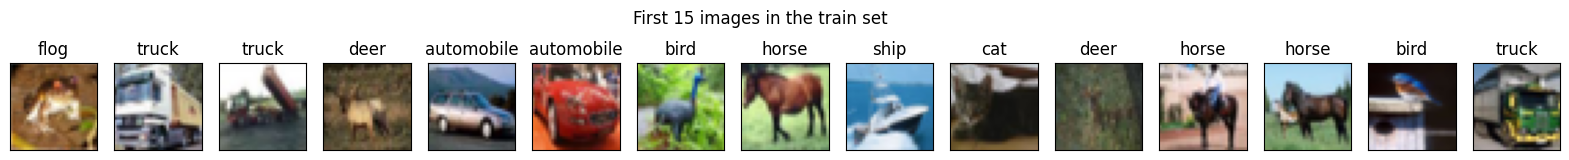

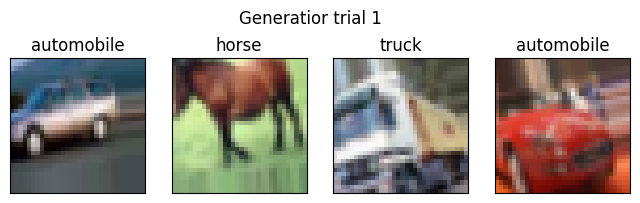

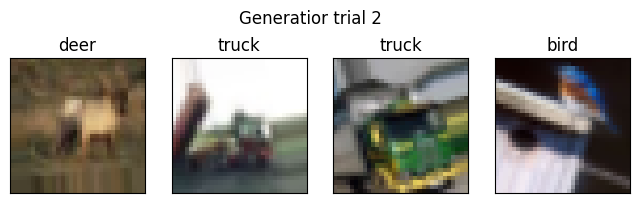

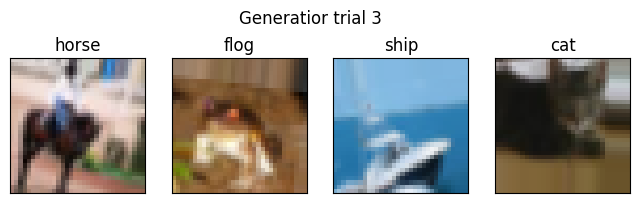

In [ ]:
# 8-5 증강된 영상 확인하기
import tensorflow.keras.datasets as ds
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 데이터 증강 지원
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
x_train=x_train.astype('float32'); x_train/=255 # 실수형으로 변환 -> 범위 [0,1]
x_train=x_train[0:15,]; y_train=y_train[0:15,]	# 50,000개 중, 앞 15개에 대해서만 증대 적용
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

# 15개 영상 display
plt.figure(figsize=(20,2))
plt.suptitle("First 15 images in the train set")
for i in range(15):
    plt.subplot(1,15,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i])])
plt.show()    

batch_siz=4			# 한 번에 생성하는 양(미니 배치) -> 단지 확인할 목적으로 작게 설정
generator=ImageDataGenerator(rotation_range=20.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True) # 데이터 변환 방식, 범위 지정
gen=generator.flow(x_train,y_train,batch_size=batch_siz)

# 세번에 걸쳐 데이터 생성
for a in range(3):
    img,label=gen.next()	# 미니 배치만큼 데이터 증강해 생성
    # 증강된 네 영상 display
    plt.figure(figsize=(8,2.4))
    plt.suptitle("Generatior trial "+str(a+1))
    for i in range(batch_siz):
        plt.subplot(1,batch_siz,i+1)
        plt.imshow(img[i])
        plt.xticks([]); plt.yticks([])
        plt.title(class_names[int(label[i])])
    plt.show()

In [ ]:
# 8-6 ResNet50으로 자연 연상 인식하기
## ResNet50을 백본모델로 사용
import cv2 as cv 
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions 

model=ResNet50(weights='imagenet') # 사전 학습 모델읽어 model에 저장, weights='imagenet'인수는 ImageNet으로 학습된 가중치 읽기

# 테스트 영상 읽고 신경망에 입력할 수 있는 형태로 변환
img=cv.imread('rabbit.jpg') 
x=np.reshape(cv.resize(img,(224,224)),(1,224,224,3))   
x=preprocess_input(x) # 영상을 신경망에 입력하기 전 수행하는 전처리

preds=model.predict(x) # 여러장으로 구성된 미니 배치 단위로 입력받고 예측을 수행하고 결과 저장
top5=decode_predictions(preds,top=5)[0] # 가장 큰 5개 확률 취함
print('예측 결과:',top5)

for i in range(5):
    cv.putText(img,top5[i][1]+':'+str(top5[i][2]),(10,20+i*20),cv.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)

cv.imshow('Recognition result',img)

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
# 8-7 DenseNet121로 견종 인식하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import image_dataset_from_directory # 필요할 때마다 사용, 폴더에서 영상을 읽는 데 사용
import pathlib

data_path=pathlib.Path('datasets/stanford_dogs/images/images')

train_ds=image_dataset_from_directory(data_path,validation_split=0.2,subset='training',seed=123,image_size=(224,224),batch_size=16) # train
test_ds=image_dataset_from_directory(data_path,validation_split=0.2,subset='validation',seed=123,image_size=(224,224),batch_size=16) # valid

# 신경망 모델 구성
base_model=DenseNet121(weights='imagenet',include_top=False,input_shape=(224,224,3)) # include_top=False: 모델의 뒷쪽에 있는 완전연결층 포함시키지 X
cnn=Sequential()
cnn.add(Rescaling(1.0/255.0)) # 범위 변환
cnn.add(base_model) # densenet121 추가
cnn.add(Flatten()) # 1차원
cnn.add(Dense(1024,activation='relu')) # 완전연결층
cnn.add(Dropout(0.75)) # 드롭아웃
cnn.add(Dense(units=120,activation='softmax'))

# 미세조정 : 사전학습된 모델 뒤에 새로운 층 붙여 신경망 구성, 학습률 낮게 설정해 다시 학습하는 방식
cnn.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.000001),metrics=['accuracy'])
hist=cnn.fit(train_ds,epochs=200,validation_data=test_ds,verbose=2)

print('정확률=',cnn.evaluate(test_ds,verbose=0)[1]*100)

cnn.save('cnn_for_stanford_dogs.h5')	# 미세 조정된 모델을 파일에 저장

import pickle
f=open('dog_species_names.txt','wb')
pickle.dump(train_ds.class_names,f)
f.close()

# 정확률 , 손실함수의 학습곡선
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

In [ ]:
# 8-8 견종 인식 프로그램
import cv2 as cv 
import numpy as np
import tensorflow as tf
import winsound       
import pickle
import sys
from PyQt5.QtWidgets import *

cnn=tf.keras.models.load_model('cnn_for_stanford_dogs.h5')	# 모델 읽기
dog_species=pickle.load(open('dog_species_names.txt','rb'))	# 견종 이름
         
class DogSpeciesRecognition(QMainWindow):
    def __init__(self) :
        super().__init__()
        self.setWindowTitle('견종 인식')
        self.setGeometry(200,200,700,100) # 윈도우의 위치와 크기 지정
        
        # 버튼 생성
        fileButton=QPushButton('강아지 사진 열기',self) 
        recognitionButton=QPushButton('품종 인식',self)
        quitButton=QPushButton('나가기',self) 
        
        # 버튼의 위치와 크기 지정
        fileButton.setGeometry(10,10,100,30)
        recognitionButton.setGeometry(110,10,100,30)
        quitButton.setGeometry(510,10,100,30)
        
        # 수행할 콜백함수 생성
        fileButton.clicked.connect(self.pictureOpenFunction)
        recognitionButton.clicked.connect(self.recognitionFunction)                         
        quitButton.clicked.connect(self.quitFunction)

    # 강아지 사진 열기 : 파일에서 부라우저 읽고 영상 윈도우에 디스플레이    
    def pictureOpenFunction(self):
        fname=QFileDialog.getOpenFileName(self,'강아지 사진 읽기','./')           
        self.img=cv.imread(fname[0])
        if self.img is None: sys.exit('파일을 찾을 수 없습니다.')  
        
        cv.imshow('Dog image',self.img)          

    # 품종인식    
    def recognitionFunction(self):
        x=np.reshape(cv.resize(self.img,(224,224)),(1,224,224,3))  # img 신경망에 입력할 준비
        res=cnn.predict(x)[0]		# 예측
        top5=np.argsort(-res)[:5]
        top5_dog_species_names=[dog_species[i] for i in top5] # 인덱스를 견종이름으로 변환
        for i in range(5):
            # 품종 이름과 확률 작성
            prob='('+str(res[top5[i]])+')'
            name=str(top5_dog_species_names[i]).split('-')[1]
            cv.putText(self.img,prob+name,(10,100+i*30),cv.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        cv.imshow('Dog image',self.img)   
        winsound.Beep(1000,500)

    # 나가기 : 윈도우 닫고 프로그램 종료            
    def quitFunction(self):
        cv.destroyAllWindows()        
        self.close()

# 프로그램 메인              
app=QApplication(sys.argv) 
win=DogSpeciesRecognition() 
win.show()
app.exec_()

In [ ]:
# 9-1
import numpy as np
import cv2 as cv
import sys

# YOLO 모델 구성
def construct_yolo_v3():
    # 부류 이름 읽어 class에 저장
    f=open('coco_names.txt', 'r') 
    class_names=[line.strip() for line in f.readlines()]

    model=cv.dnn.readNet('yolov3.weights','yolov3.cfg') # 가중치정보, 신경망 구조 정보
    # 각 층을 알아내어 outlayers 에 객체 저장
    layer_names=model.getLayerNames() 
    out_layers=[layer_names[i-1] for i in model.getUnconnectedOutLayers()]
    
    return model,out_layers,class_names

# YOLO모델 img 영상에서 물체 검출해 반환
def yolo_detect(img,yolo_model,out_layers):
    height,width=img.shape[0],img.shape[1] # 원본 영상 크기 저장
    test_img=cv.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True) # 영상을 yolo에 입력할 수 있는 형태로 변환
    
    yolo_model.setInput(test_img)
    output3=yolo_model.forward(out_layers) # 신경망의 전방계산 수행
    
    box,conf,id=[],[],[]		# 박스, 신뢰도, 부류 번호
    for output in output3: # 세개의 텐서 반복처리
        for vec85 in output: # 85차원 벡터 반복처리
            scores=vec85[5:]
            class_id=np.argmax(scores) # 부류번호
            confidence=scores[class_id] # 확률

            if confidence>0.5:	# 신뢰도가 50% 이상인 경우만 취함
                centerx,centery=int(vec85[0]*width),int(vec85[1]*height)
                w,h=int(vec85[2]*width),int(vec85[3]*height)
                x,y=int(centerx-w/2),int(centery-h/2)
                box.append([x,y,x+w,y+h])
                conf.append(float(confidence))
                id.append(class_id)
            
    ind=cv.dnn.NMSBoxes(box,conf,0.5,0.4) # 박스를 대상으로 비최대 억제를 적용해 중복성 제거
    objects=[box[i]+[conf[i]]+[id[i]] for i in range(len(box)) if i in ind]
    return objects

# 메인 프로그램
model,out_layers,class_names=construct_yolo_v3()		# YOLO 모델 생성
colors=np.random.uniform(0,255,size=(len(class_names),3))	# 부류마다 색깔

img=cv.imread('soccer.jpg')
if img is None: sys.exit('파일이 없습니다.')

res=yolo_detect(img,model,out_layers)	# YOLO 모델로 물체 검출

for i in range(len(res)):			# 검출된 물체를 영상에 표시
    x1,y1,x2,y2,confidence,id=res[i]
    text=str(class_names[id])+'%.3f'%confidence
    cv.rectangle(img,(x1,y1),(x2,y2),colors[id],2)
    cv.putText(img,text,(x1,y1+30),cv.FONT_HERSHEY_PLAIN,1.5,colors[id],2)

cv.imshow("Object detection by YOLO v.3",img)

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
# 9-2
import numpy as np
import cv2 as cv
import sys

def construct_yolo_v3():
    f=open('coco_names.txt', 'r')
    class_names=[line.strip() for line in f.readlines()]

    model=cv.dnn.readNet('yolov3.weights','yolov3.cfg')
    layer_names=model.getLayerNames()
    out_layers=[layer_names[i-1] for i in model.getUnconnectedOutLayers()]
    
    return model,out_layers,class_names

def yolo_detect(img,yolo_model,out_layers):
    height,width=img.shape[0],img.shape[1]
    test_img=cv.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True)
    
    yolo_model.setInput(test_img)
    output3=yolo_model.forward(out_layers)
    
    box,conf,id=[],[],[]		# 박스, 신뢰도, 부류 번호
    for output in output3:
        for vec85 in output:
            scores=vec85[5:]
            class_id=np.argmax(scores)
            confidence=scores[class_id]
            if confidence>0.5:	# 신뢰도가 50% 이상인 경우만 취함
                centerx,centery=int(vec85[0]*width),int(vec85[1]*height)
                w,h=int(vec85[2]*width),int(vec85[3]*height)
                x,y=int(centerx-w/2),int(centery-h/2)
                box.append([x,y,x+w,y+h])
                conf.append(float(confidence))
                id.append(class_id)
            
    ind=cv.dnn.NMSBoxes(box,conf,0.5,0.4)
    objects=[box[i]+[conf[i]]+[id[i]] for i in range(len(box)) if i in ind]
    return objects

model,out_layers,class_names=construct_yolo_v3()		# YOLO 모델 생성
colors=np.random.uniform(0,255,size=(len(class_names),3))	# 부류마다 색깔
#########################################################################################
##확장해 비디오에서 물체 검출##

# 웹캠에서 비디오 읽어 디스플레이
cap=cv.VideoCapture(0,cv.CAP_DSHOW)
if not cap.isOpened(): sys.exit('카메라 연결 실패')

while True:
    ret,frame=cap.read()
    if not ret: sys.exit('프레임 획득에 실패하여 루프를 나갑니다.')
        
    res=yolo_detect(frame,model,out_layers)   # 획득한 현재 프레임을 입력해 물체 검출, 결과 저장

    # 검출한 물체 정보 영상 표시
    for i in range(len(res)):
        x1,y1,x2,y2,confidence,id=res[i]
        text=str(class_names[id])+'%.3f'%confidence
        cv.rectangle(frame,(x1,y1),(x2,y2),colors[id],2)
        cv.putText(frame,text,(x1,y1+30),cv.FONT_HERSHEY_PLAIN,1.5,colors[id],2)
    # 디스플레이
    cv.imshow("Object detection from video by YOLO v.3",frame)
    
    key=cv.waitKey(1) 
    if key==ord('q'): break 
    
cap.release()		# 카메라와 연결을 끊음
cv.destroyAllWindows()

In [ ]:
# 9-3
import numpy as np
import cv2 as cv
import sys

def construct_yolo_v3():
    f=open('coco_names.txt', 'r')
    class_names=[line.strip() for line in f.readlines()]

    model=cv.dnn.readNet('yolov3.weights','yolov3.cfg')
    layer_names=model.getLayerNames()
    out_layers=[layer_names[i-1] for i in model.getUnconnectedOutLayers()]
    
    return model,out_layers,class_names

def yolo_detect(img,yolo_model,out_layers):
    height,width=img.shape[0],img.shape[1]
    test_img=cv.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True)
    
    yolo_model.setInput(test_img)
    output3=yolo_model.forward(out_layers)
    
    box,conf,id=[],[],[]		# 박스, 신뢰도, 부류 번호
    for output in output3:
        for vec85 in output:
            scores=vec85[5:]
            class_id=np.argmax(scores)
            confidence=scores[class_id]
            if confidence>0.5:	# 신뢰도가 50% 이상인 경우만 취함
                centerx,centery=int(vec85[0]*width),int(vec85[1]*height)
                w,h=int(vec85[2]*width),int(vec85[3]*height)
                x,y=int(centerx-w/2),int(centery-h/2)
                box.append([x,y,x+w,y+h])
                conf.append(float(confidence))
                id.append(class_id)
            
    ind=cv.dnn.NMSBoxes(box,conf,0.5,0.4)
    objects=[box[i]+[conf[i]]+[id[i]] for i in range(len(box)) if i in ind]
    return objects

model,out_layers,class_names=construct_yolo_v3()		# YOLO 모델 생성
colors=np.random.uniform(0,255,size=(len(class_names),3))	# 부류마다 색깔

#########################################################################################
## 시간을 재는 기능을 추가해 초당 몇 프레임 처리하는지, 비디오 처리량 측정 ## 

cap=cv.VideoCapture(0,cv.CAP_DSHOW)
if not cap.isOpened(): sys.exit('카메라 연결 실패')

import time

start=time.time() # 시작시간 저장
n_frame=0 
while True:
    ret,frame=cap.read()
    if not ret: sys.exit('프레임 획득에 실패하여 루프를 나갑니다.')
        
    res=yolo_detect(frame,model,out_layers)   
 
    for i in range(len(res)):
        x1,y1,x2,y2,confidence,id=res[i]
        text=str(class_names[id])+'%.3f'%confidence
        cv.rectangle(frame,(x1,y1),(x2,y2),colors[id],2)
        cv.putText(frame,text,(x1,y1+30),cv.FONT_HERSHEY_PLAIN,1.5,colors[id],2)
    
    cv.imshow("Object detection from video by YOLO v.3",frame)
    n_frame+=1
    
    key=cv.waitKey(1) 
    if key==ord('q'): break 

end=time.time()
# 비디오 처리량 출력
print('처리한 프레임 수=',n_frame,', 경과 시간=',end-start,'\n초당 프레임 수=',n_frame/(end-start))

cap.release()		# 카메라와 연결을 끊음
cv.destroyAllWindows()

In [ ]:
# 9-4
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers
import os
import random
import cv2 as cv

# 영상 폴더와 레이블 폴더 지정
input_dir='./datasets/oxford_pets/images/images/'
target_dir='./datasets/oxford_pets/annotations/annotations/trimaps/'
img_siz=(160,160)	# 모델에 입력되는 영상 크기로 정규화해 신경망 입력
n_class=3		# 분할 레이블 (1:물체, 2:배경, 3:경계)
batch_siz=32		# 미니 배치 크기

# 영상폴더에서 영상이름 수집
img_paths=sorted([os.path.join(input_dir,f) for f in os.listdir(input_dir) if f.endswith('.jpg')])
# 영상이름은 모으는데 ._ 시작하는 영상 배제
label_paths=sorted([os.path.join(target_dir,f) for f in os.listdir(target_dir) if f.endswith('.png') and not f.startswith('.')])

class OxfordPets(keras.utils.Sequence):
  # 데이터셋 준비하는 데 필요한 여러 가지 멤버 변숫값으로 설정
    def __init__(self, batch_size,img_size,img_paths,label_paths):
        self.batch_size=batch_size
        self.img_size=img_size
        self.img_paths=img_paths
        self.label_paths=label_paths

  # 미니 배치 개수 계산
    def __len__(self):
        return len(self.label_paths)//self.batch_size

  # 학습 수행하는 fit 함수가 원할때마다 미니배치 생성
    def __getitem__(self,idx):
        i=idx*self.batch_size
        batch_img_paths=self.img_paths[i:i+self.batch_size]
        batch_label_paths=self.label_paths[i:i+self.batch_size]
        x=np.zeros((self.batch_size,)+self.img_size+(3,),dtype="float32")
        for j,path in enumerate(batch_img_paths):
            img=load_img(path,target_size=self.img_size)
            x[j]=img
        y=np.zeros((self.batch_size,)+self.img_size+(1,),dtype="uint8")
        for j,path in enumerate(batch_label_paths):
            img=load_img(path,target_size=self.img_size,color_mode="grayscale")
            y[j]=np.expand_dims(img,2)
            y[j]-=1		# 부류 번호를 1,2,3에서 0,1,2로 변환
        return x,y

# Unet 기반 모델을 생성
def make_model(img_size,num_classes):
    inputs=keras.Input(shape=img_size+(3,)) # 입력하는 층 추가

    # U-net의 다운 샘플링(축소 경로)
    ## 첫 컨볼루션 층
    x=layers.Conv2D(32,3,strides=2,padding='same')(inputs)
    x=layers.BatchNormalization()(x)
    x=layers.Activation('relu')(x)

    previous_block_activation=x		# 지름길 연결을 위해

    for filters in [64,128,256]:
        x=layers.Activation('relu')(x)
        x=layers.SeparableConv2D(filters,3,padding='same')(x)
        x=layers.BatchNormalization()(x)
        x=layers.Activation('relu')(x)
        x=layers.SeparableConv2D(filters,3,padding='same')(x)
        x=layers.BatchNormalization()(x)
        x=layers.MaxPooling2D(3,strides=2,padding='same')(x)
        residual=layers.Conv2D(filters,1,strides=2,padding='same')(previous_block_activation)
        x=layers.add([x,residual])	# 지름길 연결  
        previous_block_activation=x	# 지름길 연결을 위해

    # U-net의 업 샘플링(확대 경로)
    for filters in [256, 128, 64, 32]:
        x=layers.Activation('relu')(x)
        x=layers.Conv2DTranspose(filters,3,padding='same')(x)
        x=layers.BatchNormalization()(x)
        x=layers.Activation('relu')(x)
        x=layers.Conv2DTranspose(filters,3,padding='same')(x)
        x=layers.BatchNormalization()(x)
        x=layers.UpSampling2D(2)(x)
        residual=layers.UpSampling2D(2)(previous_block_activation)
        residual=layers.Conv2D(filters,1,padding='same')(residual)
        x=layers.add([x,residual])	# 지름길 연결
        previous_block_activation=x	# 지름길 연결을 위해

    # 마지막 컨볼루션층 쌓아 신경망 완성
    outputs=layers.Conv2D(num_classes,3,activation='softmax',padding='same')(x)
    model=keras.Model(inputs, outputs)	# 모델 생성
    return model

# 메인 함수
model=make_model(img_siz,n_class)		# 모델 생성

random.Random(1).shuffle(img_paths)
random.Random(1).shuffle(label_paths)
test_samples=int(len(img_paths)*0.1)	# 10%를 테스트 집합으로 사용
train_img_paths=img_paths[:-test_samples]
train_label_paths=label_paths[:-test_samples]
test_img_paths=img_paths[-test_samples:]
test_label_paths=label_paths[-test_samples:]

train_gen=OxfordPets(batch_siz,img_siz,train_img_paths,train_label_paths) # 훈련 집합
test_gen=OxfordPets(batch_siz,img_siz,test_img_paths,test_label_paths) # 검증 집합

# 학습실행
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cb=[keras.callbacks.ModelCheckpoint('oxford_seg.h5',save_best_only=True)] # 학습 결과 자동 저장 : 가장 높은 성능의 가중치 저장
model.fit(train_gen,epochs=30,validation_data=test_gen,callbacks=cb)

preds=model.predict(test_gen)	# 예측

cv.imshow('Sample image',cv.imread(test_img_paths[0]))# 0번 영상 디스플레이
cv.imshow('Segmentation label',cv.imread(test_label_paths[0])*64)
cv.imshow('Segmentation prediction',preds[0]) # 0번 영상 예측 결과 디스플레이

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
# 9-5 pixellib 라이브러리로 정지영상 의미분할
from pixellib.semantic import semantic_segmentation
import cv2 as cv

seg=semantic_segmentation()
seg.load_ade20k_model('deeplabv3_xception65_ade20k.h5') # 학습한 모델읽기

# 의미분할 수행
img_fname='busy_street.jpg'
seg.segmentAsAde20k(img_fname,output_image_name='image_new.jpg') 
info1,img_segmented1=seg.segmentAsAde20k(img_fname) # 분할 결과 반환받아 메타 정보, 분할영상 저장
info2,img_segmented2=seg.segmentAsAde20k(img_fname,overlay=True) # 기존 영상에 분할 결과 투명하게 겹쳐 표시

cv.imshow('Image original',cv.imread(img_fname))
cv.imshow('Image segmention',img_segmented1)
cv.imshow('Image segmention overlayed',img_segmented2)

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
# 9-6 비디오 의미분할
from pixellib.semantic import semantic_segmentation
import cv2 as cv

cap=cv.VideoCapture(0) # 웹캠 연결

seg_video=semantic_segmentation()
seg_video.load_ade20k_model('deeplabv3_xception65_ade20k.h5')

# 웹캠으로 들어오는 비디오 분할
seg_video.process_camera_ade20k(cap,overlay=True,frames_per_second=2,output_video_name='output_video.mp4',show_frames=True,frame_name='Pixellib')

cap.release()
cv.destroyAllWindows()

In [ ]:
# 9-7
from pixellib.instance import instance_segmentation # 사례분할에 적용할 클래스
import cv2 as cv

seg=instance_segmentation()
seg.load_model("mask_rcnn_coco.h5")

img_fname='busy_street.jpg'
info,img_segmented=seg.segmentImage(img_fname,show_bboxes=True)
# show_bboxes=True : 영역 각각에 박스를 씌우고 물체 확률 표시

cv.imshow('Image segmention overlayed',img_segmented)

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
# 9-8
from pixellib.instance import instance_segmentation
import cv2 as cv

cap=cv.VideoCapture(0)

seg_video=instance_segmentation()
seg_video.load_model("mask_rcnn_coco.h5")

target_class=seg_video.select_target_classes(person=True,book=True) # 관심부류 지정
seg_video.process_camera(cap,segment_target_classes=target_class,frames_per_second=2,show_frames=True,frame_name='Pixellib',show_bboxes=True)  # 사례분할
# 웹캠과연결한 객체, 관심부류, 초당프레임수, 윈도우 열어 실시간으로 분할결과 표시

cap.release()
cv.destroyAllWindows()

In [ ]:
# 9-9
import cv2 as cv
import numpy as np
from PyQt5.QtWidgets import *
import sys
from pixellib.tune_bg import alter_bg # pixellib 기능 활용을 위함
    
class VideoSpecialEffect(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('배경을 내 맘대로')
        self.setGeometry(200,200,400,100)
       
        videoButton=QPushButton('배경 내 맘대로 켜기',self)
        self.pickCombo=QComboBox(self)     
        self.pickCombo.addItems(['원래 영상','흐릿(조금)','흐릿(중간)','흐릿(많이)','빨강','녹색','파랑'])
        quitButton=QPushButton('나가기',self)        
        
        videoButton.setGeometry(10,10,140,30)
        self.pickCombo.setGeometry(150,10,110,30)     # 콤보박스 지정             
        quitButton.setGeometry(280,10,100,30)
        
        videoButton.clicked.connect(self.videoSpecialEffectFunction) 
        quitButton.clicked.connect(self.quitFunction)
        
    def videoSpecialEffectFunction(self):             
        self.cap=cv.VideoCapture(0,cv.CAP_DSHOW) 
        if not self.cap.isOpened(): sys.exit('카메라 연결 실패')
        
        while True:
            ret,frame=self.cap.read()  
            if not ret: break

            pick_effect=self.pickCombo.currentIndex()        
            if pick_effect==0:
                special_img=frame # 콤보박스 선택결과에 따라 7가지 경우 처리
            elif pick_effect==1:
                special_img=change_bg.blur_frame(frame,low=True,detect='person')
            elif pick_effect==2:
                special_img=change_bg.blur_frame(frame,moderate=True,detect='person')
            elif pick_effect==3:    
                special_img=change_bg.blur_frame(frame,extreme=True,detect='person')
            elif pick_effect==4:    
                special_img=change_bg.color_frame(frame,colors=(255,0,0),detect='person')
            elif pick_effect==5:    
                special_img=change_bg.color_frame(frame,colors=(0,255,0),detect='person')
            elif pick_effect==6:    
                special_img=change_bg.color_frame(frame,colors=(0,0,255),detect='person')
                
            cv.imshow('Special effect',special_img)              
            cv.waitKey(1) 
                                        
    def quitFunction(self):
        self.cap.release()
        cv.destroyAllWindows()        
        self.close()

change_bg=alter_bg(model_type="pb") #
change_bg.load_pascalvoc_model('xception_pascalvoc.pb') #
                
app=QApplication(sys.argv) 
win=VideoSpecialEffect() 
win.show()
app.exec_()